In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import umap

In [45]:
data = pd.read_csv("GSE20680.csv")
data.head()

,sample_id,cad_status,g1,g2,g3,g4,g5,g6,g7,g8,...,g45006,g45007,g45008,g45009,g45010,g45011,g45012,g45013,g45014,g45015
0,GSM518638,Control (0),14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,...,4.375744,4.375470,4.375175,4.374851,4.374460,4.374081,4.373631,4.373159,14.601661,14.611620
1,GSM518639,Control (0),14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,...,4.369999,4.369760,4.369473,4.369171,4.368822,4.368453,4.368054,4.367606,14.644090,14.645912
2,GSM518640,Control (0),14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,...,4.414065,4.413724,4.413332,4.412898,4.412431,4.411905,4.490200,4.410683,14.762733,14.760449
3,GSM518641,Control (0),13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,...,4.381866,4.381684,4.381487,4.381260,4.381008,4.402942,4.380408,4.380068,12.963127,12.872982
4,GSM518642,Control (0),13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,...,4.359774,4.359587,4.359380,4.359152,4.358910,4.358640,4.358351,4.358035,13.632483,13.543409


In [46]:
data_matrix = data.iloc[0:196,2:45017]
data_matrix.iloc[0:10, 0:10]

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10
0,14.411865,4.382594,4.383032,4.383413,4.383747,4.384047,4.384308,4.384539,4.384732,4.384889
1,14.716279,4.364848,4.365359,4.365832,4.366276,4.366695,4.367058,4.367406,4.367707,4.367985
2,14.774350,4.411638,4.412673,4.413624,4.414528,4.415355,4.416127,4.416819,4.417455,4.418045
3,13.386424,4.378086,4.378739,4.379347,4.379895,4.380422,4.380914,4.381344,4.381747,4.382130
4,13.486229,4.364260,4.364589,4.364898,4.365172,4.365435,4.365664,4.365880,4.366071,4.366241
5,13.593626,4.369297,4.369708,4.370090,4.370448,4.370766,4.371047,4.371302,4.371525,4.371717
6,14.689596,4.393339,4.393933,4.394460,4.394966,4.395464,4.395904,4.396311,4.396713,4.397059
7,14.771351,4.386991,4.387518,4.388000,4.388432,4.388825,4.389163,4.389462,4.389717,4.389940
8,15.440722,4.387858,4.388150,4.388416,4.388647,4.388847,4.389015,4.389154,4.389262,4.389348
9,13.740780,4.565573,4.571993,4.740558,4.499441,4.499631,4.466591,4.397839,4.398353,4.398802


In [47]:
SS = MinMaxScaler()

# Apply scaling
data_scaled = pd.DataFrame(SS.fit_transform(data_matrix), columns=data_matrix.columns)

# PCA
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)

# Convert to data frame
principal_df = pd.DataFrame(data = data_scaled_pca, columns = ['PC1', 'PC2'])
principal_df = principal_df.join(gse_20680['cad_status'])

# Shape and preview
print(principal_df.shape)
print(pca.explained_variance_ratio_)

(195, 3)
[0.1889748 0.10428  ]


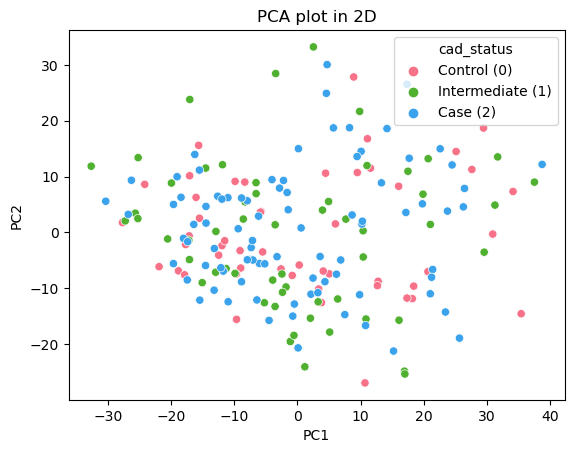

In [50]:
plt.figure()

# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,0], y=principal_df.iloc[:,1], hue=principal_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [51]:
# t-SNE
tsne = TSNE(n_components=2)
data_scaled_tsne = tsne.fit_transform(data_scaled)

# Convert to data frame
tsne_df = pd.DataFrame(data = data_scaled_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
tsne_df = tsne_df.join(gse_20680['cad_status'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(195, 3)


,tsne comp. 1,tsne comp. 2,cad_status
0,4.403478,-0.675154,Control (0)
1,0.748377,1.377845,Control (0)
2,-5.062588,-3.495054,Control (0)
3,-1.365920,3.922612,Control (0)
4,3.829370,-1.529145,Control (0)


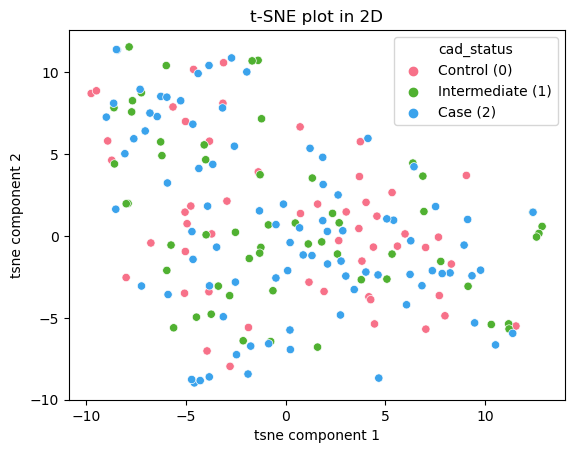

In [52]:
plt.figure()

# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,0], y=tsne_df.iloc[:,1], hue=tsne_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

plt.show()

In [53]:
# UMAP
um = umap.UMAP()
data_scaled_fit = um.fit(data_scaled)           # we'll use X_fit later
data_scaled_umap = um.transform(data_scaled)

# Convert to data frame
umap_df = pd.DataFrame(data = data_scaled_umap, columns = ['umap comp. 1', 'umap comp. 2'])
umap_df = umap_df.join(gse_20680['cad_status'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(195, 3)


,umap comp. 1,umap comp. 2,cad_status
0,5.212075,9.987622,Control (0)
1,3.444244,8.743464,Control (0)
2,4.584051,7.402331,Control (0)
3,4.820650,8.019887,Control (0)
4,4.651811,10.432999,Control (0)


/Users/niranjan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


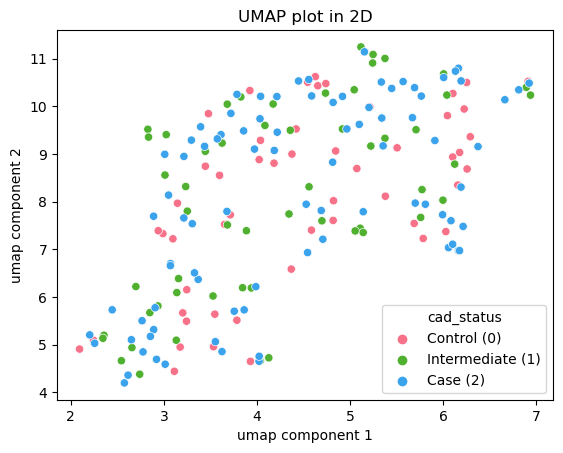

In [55]:
plt.figure()

# Scatterplot
sns.scatterplot(umap_df.iloc[:,0], umap_df.iloc[:,1], hue=umap_df.iloc[:,2], palette='husl')

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

plt.show()